[View in Colaboratory](https://colab.research.google.com/github/MicroprocessorX069/Mouse-Cursor-Detection/blob/master/Cursor_Detection.ipynb)

Using Open cv2 function matchTemplate()

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
template=np.array(cv2.imread('template.png'))
template_bnw= np.array(cv2.imread('template.png',0))
testImg=np.array(cv2.imread('pos_3.jpg'))
testImg_bnw= np.array(cv2.imread('pos_3.jpg',0))

temp_x=len(template[0])
temp_y=len(template)
print(int(temp_x/2))
print(temp_x,temp_y)
img_x=len(testImg[0])
img_y=len(testImg)
print(img_x,img_y)

result1 = cv2.matchTemplate(template,testImg,cv2.TM_CCOEFF_NORMED)
y1,x1 = np.unravel_index(result1.argmax(), result1.shape)
result2 = cv2.matchTemplate(template,testImg,cv2.TM_CCOEFF)
y2,x2 = np.unravel_index(result2.argmax(), result2.shape)
result3 = cv2.matchTemplate(template,testImg,cv2.TM_CCORR_NORMED)
y3,x3 = np.unravel_index(result3.argmax(), result3.shape)
result4 = cv2.matchTemplate(template,testImg,cv2.TM_CCORR)
y4,x4 = np.unravel_index(result4.argmax(), result4.shape)

testImg[x1,y1]=0
testImg[x1+1,y1]=0
testImg[x1,y1+1]=0
print(x1,y1)
print(x2,y2)
print(x3,y3)
print(x4,y4)
plt.imshow(testImg[10:650,10:650])

In [0]:

def pad_image(image,pad_x,pad_y):
  image_x=len(image[0])
  image_y=len(image)
  padded_image=np.zeros((image_y+pad_y,image_x+pad_x))
  padded_image_x=len(padded_image[0])
  padded_image_y=len(padded_image)
  
  for i in range(image_y):
    for j in range(image_x):
      padded_image[i,j]=image[i,j]
  return(padded_image)

def convolution(input_img, kernel):
  
  
  #input_image=negative(input_image)
  input_image=np.array(input_img)
  padded_input=pad_image(input_image,int((len(kernel)-1)/2),int((len(kernel[0])-1)/2))
  padded_input=np.array(padded_input)

  new_image=np.zeros((len(input_image),len(input_image[0])))

  for input_x in range(len(input_image)):
    for input_y in range(len(input_image[0])):
        new_image[input_x,input_y]=0
        for kernel_x in range(len(kernel)):
           for kernel_y in range(len(kernel[0])):
              new_image[input_x,input_y]=int(new_image[input_x,input_y]) + int(padded_input[input_x+kernel_x, input_y+kernel_y])*int(kernel[kernel_x,kernel_y])
  '''new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
        if(new_image[x,y]>=50):
           new_image2[x,y]=0
        else:
           new_image2[x,y]=150'''
  return(new_image)

import scipy.stats as st
def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)  
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel
#plt.imshow(gkern(21,10))

import numpy as np
def gaussian_blur(input_image,sig):
    kernel=gkern(3,sig)
    input_image=np.array(input_image)
    padded_input=np.pad(input_image,(int((len(kernel))/2),int((len(kernel))/2)),'constant')
    padded_input=np.array(padded_input)
    new_image=np.zeros((len(input_image),len(input_image[0])))
    for input_x in range(int((len(kernel))/2),(len(padded_input)-int((len(kernel))/2))):
      for input_y in range(int((len(kernel))/2),(len(padded_input[0])-int((len(kernel))/2))):
          #padded_input[input_x,input_y]=0
          '''for kernel_x in range(len(kernel)):
             for kernel_y in range(len(kernel[0])):
                  padded_input[input_x,input_y]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x-int((len(kernel))/2), input_y+kernel_y-int((len(kernel))/2)]*kernel[kernel_x,kernel_y]
                  new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=padded_input[input_x,input_y]
                  '''
          padded_input_slice=padded_input[input_x-int((len(kernel))/2):input_x+int((len(kernel))/2)+1,input_y-int((len(kernel[0]))/2):input_y+int((len(kernel[0]))/2)+1]
          product_mat=np.multiply(padded_input_slice,kernel)
          new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=np.sum(product_mat)       
                 #new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x-int((len(kernel))/2), input_y+kernel_y-int((len(kernel))/2)]*kernel[kernel_x,kernel_y]
    return(new_image)   

def negative(input_image):
  #new_image2=np.zeros((len(input_image),len(input_image[0])))
  for x in range(len(input_image)):
     for y in range(len(input_image[0])):
         input_image[x,y]=255-input_image[x,y]
  return(input_image)

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, tnrange, tqdm


def linearSpatialFiltering(inputImg, template):
  
  #Reading image from colab's local storage
 
  template=template
  temp_2=np.power(template,2)
  testImg=inputImg
  #testImg=np.array([[0,0,0,0],[0,0,10,0],[0,0,10,0],[0,0,0,0]])
  
  temp_w=len(template[0])
  temp_h=len(template)
  temp_x2=int(temp_w/2)
  temp_y2=int(temp_h/2)
  img_w=len(testImg[0])
  img_h=len(testImg)
  #print(img_x,img_y)
  
  #Padding test image depending on the size of template
  paddedTestImg=pad_image(testImg,temp_w,temp_h)
    
  test_img_test=np.zeros(testImg.shape)
  test_img_test2=np.zeros(testImg.shape)
  for img_i in (range(img_h-temp_h)):
    for img_j in range(img_w-temp_w):
      
      paddedTestSlice=np.power(testImg[img_i:img_i+temp_h,img_j:img_j+temp_w],2)
      #sum=convolutionSimple(paddedTestSlice,temp_2)
      sum=np.sum(np.subtract(temp_2,paddedTestSlice))
      test_img_test[img_i,img_j]=sum
  
  #print(test_img_test)    
  min_x,min_y=np.unravel_index(test_img_test.argmin(),test_img_test.shape)
  print(min_x,min_y)
  result=testImg[min_x-20:min_x+20,min_y-20:min_y+20]
  return(result)

import numpy as np
def convolution3(input_image,kernel):
    
    input_image=np.array(input_image)
    padded_input=np.pad(input_image,(int((len(kernel))/2),int((len(kernel))/2)),'constant')
    padded_input=np.array(padded_input)
    new_image=np.zeros((len(input_image),len(input_image[0])))
    for input_x in range(int((len(kernel))/2),(len(padded_input)-int((len(kernel))/2))):
      for input_y in range(int((len(kernel))/2),(len(padded_input[0])-int((len(kernel))/2))):
          #padded_input[input_x,input_y]=0
          padded_input_slice=padded_input[input_x-int((len(kernel))/2):input_x+int((len(kernel))/2)+1,input_y-int((len(kernel[0]))/2):input_y+int((len(kernel[0]))/2)+1]
          product_mat=np.multiply(padded_input_slice,kernel)
          new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=np.sum(product_mat)       
                 #new_image[input_x-int((len(kernel))/2),input_y-int((len(kernel))/2)]=padded_input[input_x,input_y]+padded_input[input_x+kernel_x-int((len(kernel))/2), input_y+kernel_y-int((len(kernel))/2)]*kernel[kernel_x,kernel_y]
    return(new_image)  

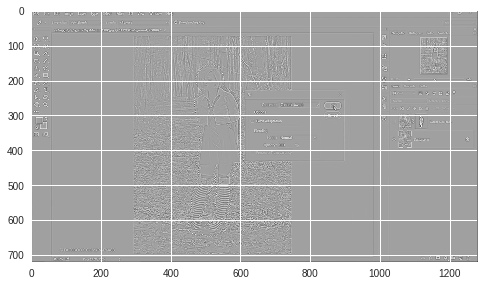

In [25]:
plt.imshow(laplacian_transform_img)

Template matching using sum of square differences.

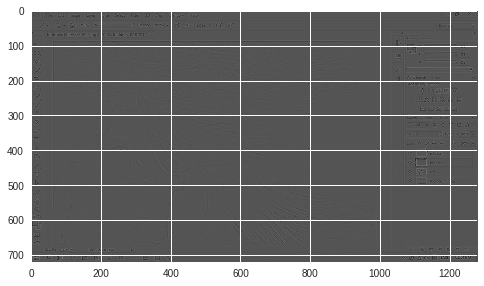

In [35]:
plt.imshow(laplacian_transform_img)

0 1251


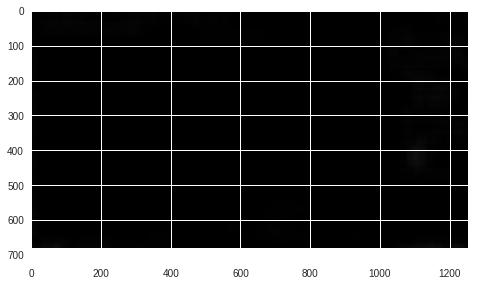

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
input_image=np.array(cv2.imread("pos_3.jpg",cv2.IMREAD_GRAYSCALE)) #make sure the path to the image is in String format
input_image=negative(input_image)
#input_image=input_image.astype(np.float32)
template= negative(np.array(cv2.imread("template.png",cv2.IMREAD_GRAYSCALE),dtype='int8'))
#template=template.astype(np.float32)

gaussian_blur_img=cv2.GaussianBlur(input_image,(3,3),0)
laplacian_kernel=[[0	,1,	0],[1,	-4	,1],[0,	1,	0]]
laplacian_transform_img=convolution3(gaussian_blur_img,laplacian_kernel)
laplacian_transform_template=convolution3(template,laplacian_kernel)
laplacian_transform_img=laplacian_transform_img.astype(np.float32)
laplacian_transform_template=laplacian_transform_template.astype(np.float32)
outputImg=linearSpatialFiltering(laplacian_transform_img,laplacian_transform_template)  
plt.imshow(outputImg)

In [0]:
def convolutionSimple(mat1,mat2):
  #print(np.sum(np.multiply(mat1,mat2)))
  return(np.sum(np.multiply(mat1,mat2)))
  

In [64]:
np.unravel_index(outputImg.argmin(),outputImg.shape)


(719, 1279)

In [65]:
np.amin(outputImg)

18792225.0

In [58]:
outputImg.shape


(720, 1280)

# Direct Functions

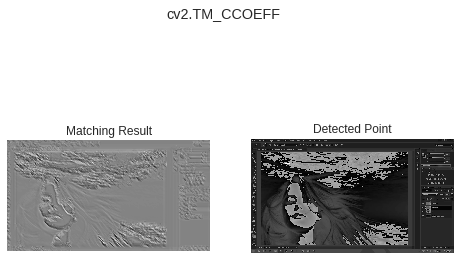

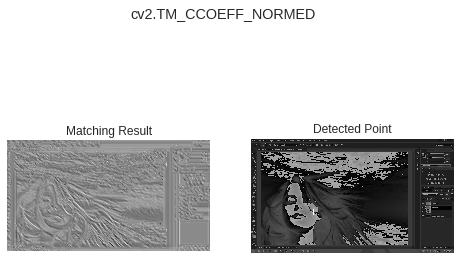

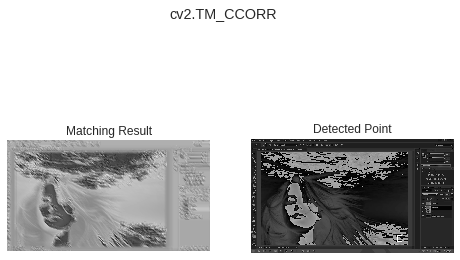

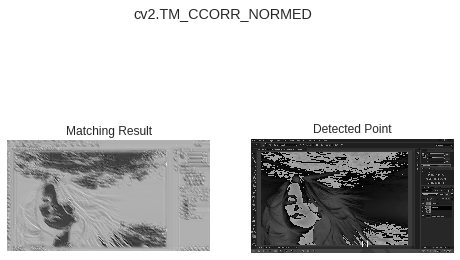

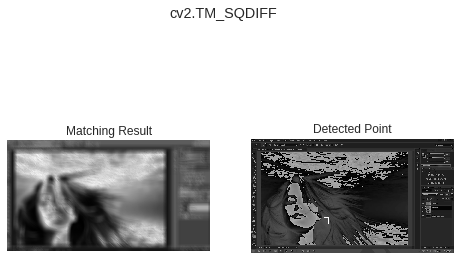

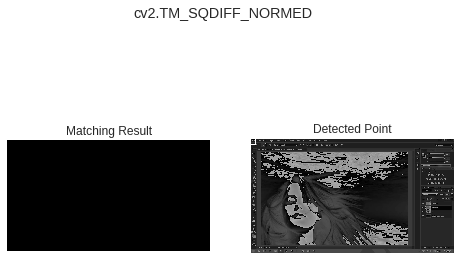

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
input_image=np.array(cv2.imread("pos_3.jpg",cv2.IMREAD_GRAYSCALE),dtype='int8') #make sure the path to the image is in String format
input_image=negative(input_image)
input_image=input_image.astype(np.float32)
template= negative(np.array(cv2.imread("template.png",cv2.IMREAD_GRAYSCALE),dtype='int8'))
template=template.astype(np.float32)
gaussian_blurred=cv2.GaussianBlur(input_image,(3,3),0)
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

laplacian_transformed=convolution3(gaussian_blurred,laplacian)
laplacian_transform_template=convolution3(template,laplacian)
#outputImg=linearSpatialFiltering(laplacian_transformed,laplacian_transform_template)
#plt.imshow(outputImg)
laplacian_transformed=laplacian_transformed.astype(np.float32)
laplacian_transform_template=laplacian_transform_template.astype(np.float32)
'''result1 = cv2.matchTemplate(laplacian_transformed,laplacian_transform_template,cv2.TM_CCOEFF_NORMED)
y1,x1 = np.unravel_index(result1.argmax(), result1.shape)
input_image_temp=input_image
input_image_temp[x1-10:x1+10,y1-10:y1+10]=0
plt.imshow(input_image_temp)'''


import cv2
import numpy as np
from matplotlib import pyplot as plt

img = gaussian_blurred
img=input_image
img2 = img.copy()

#template = laplacian_transform_template
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [19]:
print(y1,x1)

348 1237
